<a href="https://colab.research.google.com/github/Davianka/food-sales-predictions/blob/main/Project_pt_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
set_config(display='diagram')
from sklearn.compose import make_column_transformer, make_column_selector


In [ ]:
sales_predictions = '/content/drive/MyDrive/project 1/sales_predictions (1).csv'
df=pd.read_csv(sales_predictions)
df.head()
   #step 1 is to import the data over to start cleaning             

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.shape 
 #gathering as much info about the data as possible

(8523, 12)

In [ ]:
df.isna().sum()
#seeing what columns might be missing Data. Will be addressing how to clean missing values.

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [ ]:
df.duplicated().sum() #there are no duplicates

0

In [ ]:
df.nunique() 
#seeing how much unique data there is to use on future analysis

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
#about 28 percent of outlet size  is missing, so I wanted to see the categories.  
#I don't feel comfortable deleting data at this point,  outlet size might affect
#sales, i will fill those as 'missing'
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
df['Outlet_Size'].fillna('Missing', inplace=True)

In [ ]:
df['Outlet_Size'].value_counts()

Medium     2793
Missing    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [ ]:
  df['Item_Identifier'].value_counts()
#checking to see if any item identifiers have similar code to try to come up with a better mean for missing item weights 


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [ ]:
 df['Item_Type'].value_counts()#there are no inconsistant categories to merge

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df[['Item_Identifier', 'Item_Weight', 'Item_Type']]

,Item_Identifier,Item_Weight,Item_Type
0,FDA15,9.300,Dairy
1,DRC01,5.920,Soft Drinks
2,FDN15,17.500,Meat
3,FDX07,19.200,Fruits and Vegetables
4,NCD19,8.930,Household
...,...,...,...
8518,FDF22,6.865,Snack Foods
8519,FDS36,8.380,Baking Goods
8520,NCJ29,10.600,Health and Hygiene
8521,FDN46,7.210,Snack Foods


In [ ]:
filter_FDW13 = df['Item_Identifier'] == 'FDW13'
filter_fruits = df['Item_Type'] == 'Fruits and Vegetables'
df.loc[ filter_FDW13 & filter_fruits]
#i wanted to see if there were any similarities within the most popular item identifier and item type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
filter_snacks = df['Item_Type']== 'Snack Foods'
filter_household = df['Item_Type'] =='Household'
df.loc[ filter_snacks & filter_FDW13]
#i wanted to see if there were any similarities within the most popular item identifier and item type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [ ]:
mean_weight = df['Item_Weight'].mean()  
df['Item_Weight'].fillna(mean_weight, inplace=True)
df.isna().sum()
##I decided to fill the missing weight values with the average weight. There are no more missing values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
df['Item_Weight'].mean() 
#checking mean, max, and minm of numerical columns

12.857645184136409

In [ ]:
df['Item_Weight'].mode()

0    12.857645
dtype: float64

In [ ]:
df['Item_Weight'].min()

4.555

In [ ]:
df['Item_Weight'].max()

21.35

In [ ]:
df['Item_Visibility'].mean() #max(0.32839), min(0.0), mean(0.06613)


0.06613202877895127

In [ ]:
df['Item_MRP'].mean() #max (266.8884), min(31.29), mean(140.99278)

140.9927819781768

In [ ]:
df['Outlet_Establishment_Year'].mode() #max(2009), min(1985), mean(1997.8318667), mode(1985)

0    1985
dtype: int64

In [ ]:
df['Item_Outlet_Sales'].mean() #max(3086.9648), Min(33.29), mean(2181.2889), mode(958.75)

2181.2889135750365

In [ ]:
 df['Item_Fat_Content'].value_counts() 
 #changing LF and low fat to 'Low Fat'. changing reg to regular.  it makes sense to merge them.  LF and reg seem to be abbreviations

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('LF','Low Fat' )
df['Item_Fat_Content'].value_counts

<bound method IndexOpsMixin.value_counts of 0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object>

In [ ]:
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('low fat','Low Fat' )
df['Item_Fat_Content']= df['Item_Fat_Content'].replace('reg','Regular' )
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

*   Data visuals






The majority of the items on this dataframe have a visibility of 0.00-0.10


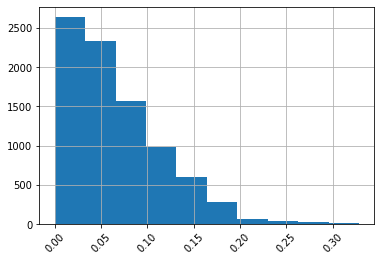

In [ ]:
df['Item_Visibility'].hist()
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')          
print('The majority of the items on this dataframe have a visibility of 0.00-0.10')

the bulk of the stores on this DataFrame are from 1999 and older.


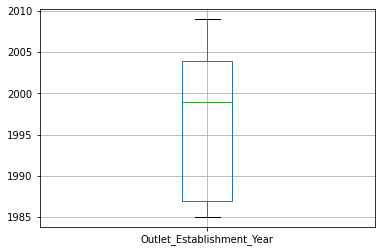

In [ ]:
df.boxplot(column='Outlet_Establishment_Year');
print('the bulk of the stores on this DataFrame are from 1999 and older.')



*   #Item MRP (material requirements planning)had the biggest correlation with Item outlet sales somewhere between .4 and .6.



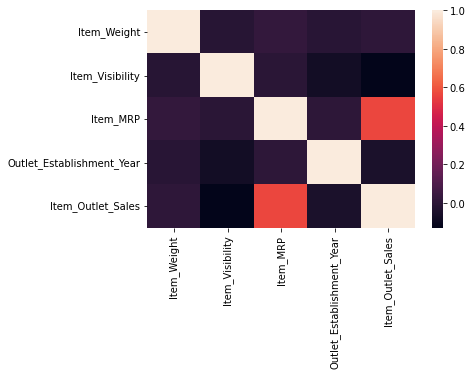

In [ ]:
sns.heatmap(data = df.corr());

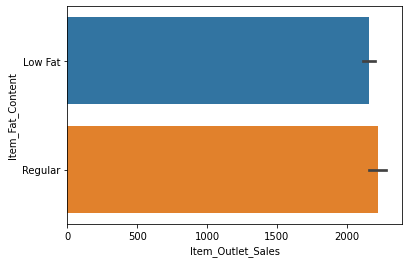

In [ ]:
sns.barplot(data=df, y='Item_Fat_Content', x='Item_Outlet_Sales');
#Low fat or Regular did not really affect sales positively or negatively.

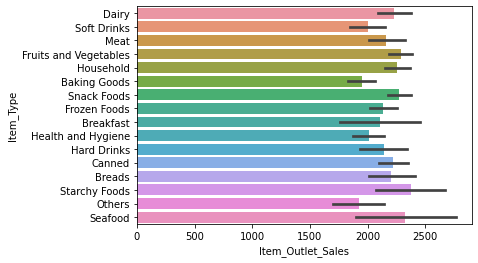

In [ ]:
sns.barplot(data=df, y='Item_Type', x='Item_Outlet_Sales');
#top 3 item sales are starchy foods, snacks and seafood

In [ ]:
sales_predictions = '/content/drive/MyDrive/project 1/sales_predictions (1).csv'
df2=pd.read_csv(sales_predictions)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df2.duplicated().sum()

0

In [ ]:
df2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
X = print(df2.info(), '\n')
print(df2.isna().sum())

In [33]:
df2['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [37]:
df2['Outlet_Size'].replace({'Medium':0, 'Small':1,'High':2}, inplace=True)
df2['Outlet_Size'].value_counts()

0.0    2793
1.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [38]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,6113.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,0.695567,2181.288914
std,4.643456,0.051598,62.275067,8.371760,0.718862,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,0.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,0.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,1.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,2.000000,13086.964800


In [39]:
X= df2.drop(columns=['Item_Outlet_Sales'])
y= df2 ['Item_Outlet_Sales']
X_train, X_test, y_train, y_test= train_test_split(X,y, random_state=42)

In [40]:
len(X)

8523

In [41]:
len(y)

8523

In [42]:
most_frequent_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()

In [43]:

freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [44]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [45]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

scaler = StandardScaler()

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [46]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [47]:
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [48]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [49]:
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc5bb336450>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc5bb336b90>)])

In [50]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc5bb336450>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fc5bb336b90>)])

In [51]:
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [52]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')


0 missing values in training data
0 missing values in testing data


In [53]:
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')



All data in X_train_processed are float64
All data in X_test_processed are float64




In [54]:
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

shape of data is (6392, 1593)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])